# Weather Prediction
#### Predicting the Air Quality Index (AQI)
- <b>Precipitation:</b> More rainfall = Better air quality <br>
Higher rainfall can help clear the air by washing out pollutants
- <b>Temperature:</b> Higher temperatures = Worse air quality<br>
High temperatures can cause more air pollution due to increased chemical reactions,<br>while cooler temperatures might help limit these reactions.
- <b>Wind:</b> Higher wind speeds = Better air quality<br>
Wind speed can disperse pollutants. Higher wind speeds tend to improve air quality by moving pollutants away,<br> while calm winds can trap pollutants, worsening air quality.

In [1]:
import pandas as pd

df = pd.read_csv(r'D:\Internships\Pantech\projects\Weather\weather.csv')
df.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [2]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64

data is clean

### Visualization - data distribution

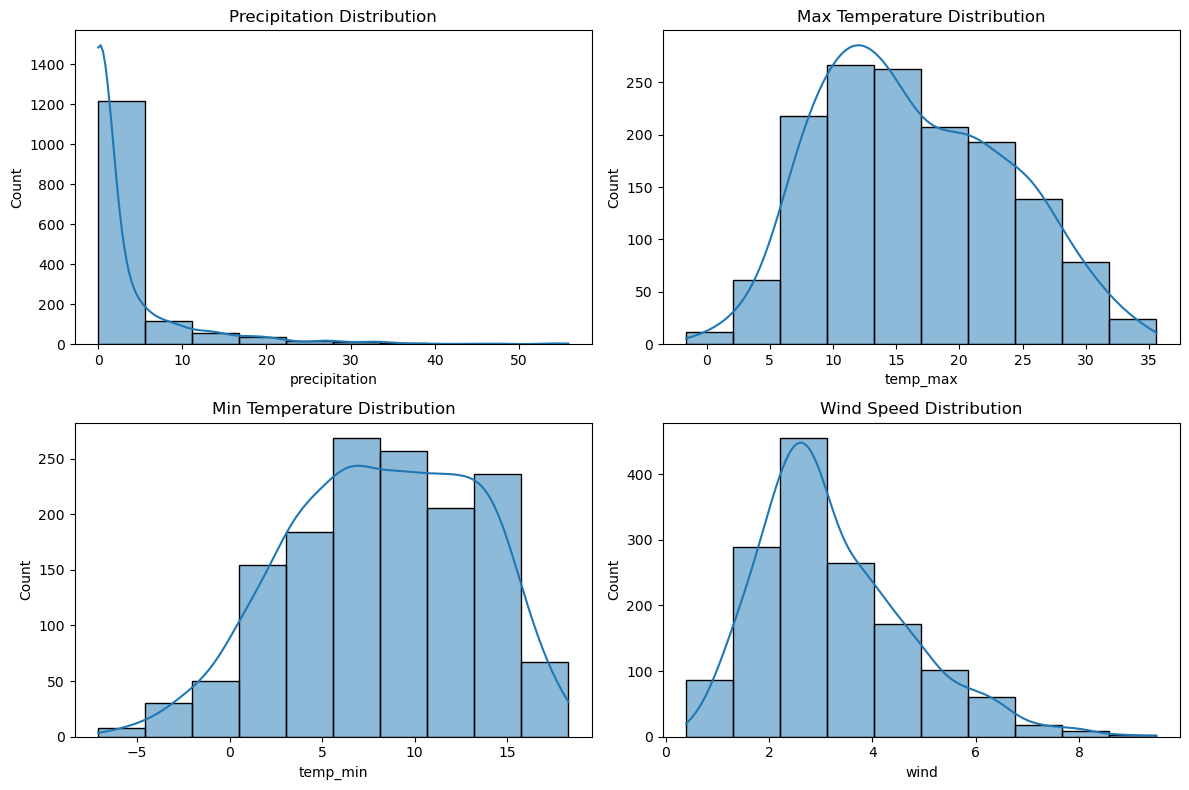

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for each feature
sns.histplot(df['precipitation'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Precipitation Distribution')

sns.histplot(df['temp_max'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Max Temperature Distribution')

sns.histplot(df['temp_min'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Min Temperature Distribution')

sns.histplot(df['wind'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

#### Feature Engineering

In [4]:
# keep only mean temperature
df['temp'] = df['temp_max'] - df['temp_min']

# Remove the temp_max and temp_min columns
df = df.drop(columns=['temp_max', 'temp_min'])

# Air Quality Index (custom formula based on domain knowledge)
df['AQI'] = 0.5 * df['precipitation'] + 0.3 * df['temp'] + 0.2 * df['wind']

df.head()

,precipitation,wind,temp,AQI
0,0.0,4.7,7.8,3.28
1,10.9,4.5,7.8,8.69
2,0.8,2.3,4.5,2.21
3,20.3,4.7,6.6,13.07
4,1.3,6.1,6.1,3.70


In [5]:
print(df['AQI'].min())
print(df['AQI'].max())

0.89
30.14


In [6]:
df.shape

(1461, 4)

AQI interpretation:
- Lower values indicate good air quality (less pollution, no risk) <br>
0 <= AQI <= 10
- Higher values indicate that the air is unhealthy <br>
AQI > 10

### Visualization - distribution plots

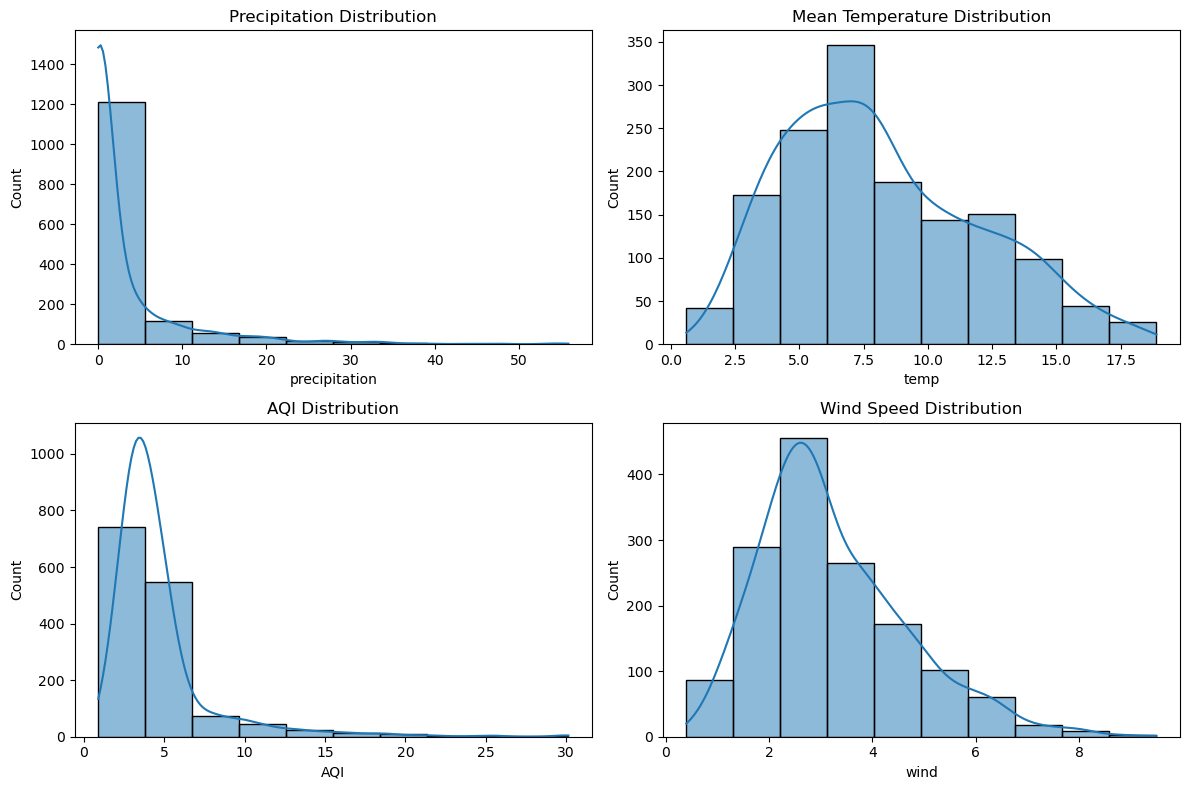

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['precipitation'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Precipitation Distribution')

sns.histplot(df['wind'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed Distribution')

sns.histplot(df['temp'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Mean Temperature Distribution')

sns.histplot(df['AQI'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('AQI Distribution')

plt.tight_layout()
plt.show()

### Visualization - relationship with target column

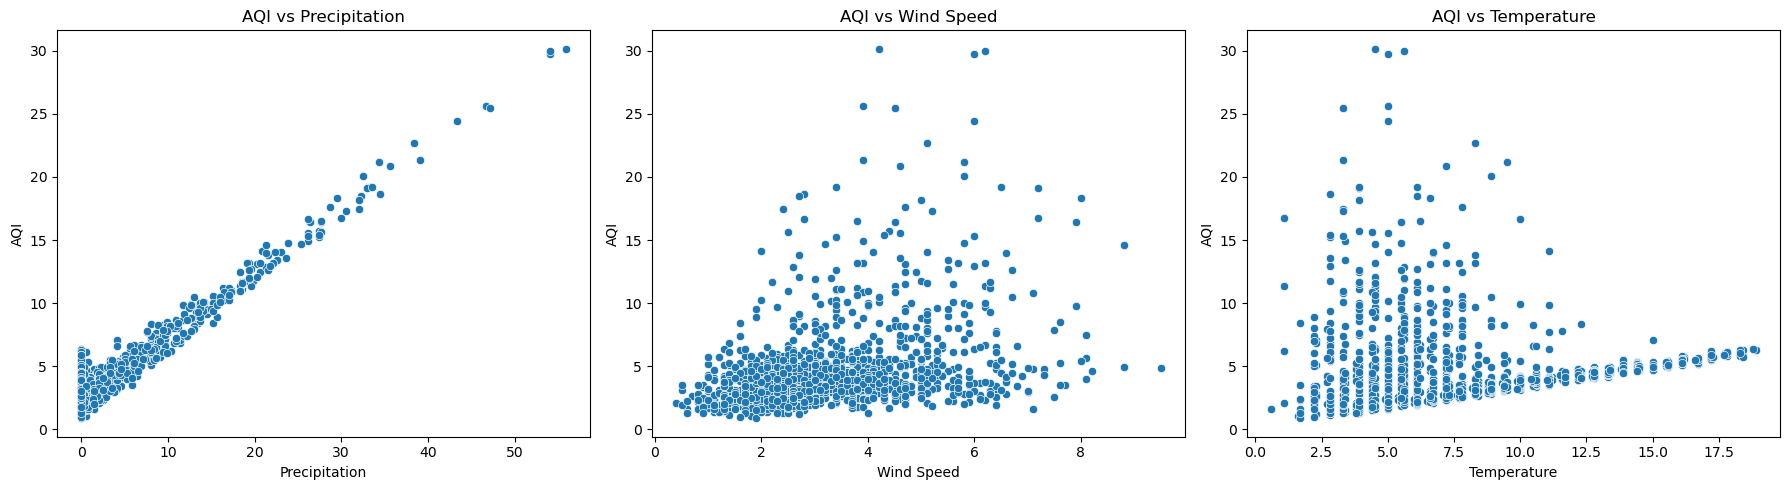

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plots
sns.scatterplot(x=df['precipitation'], y=df['AQI'], ax=axes[0])
axes[0].set_title('AQI vs Precipitation')
axes[0].set_xlabel('Precipitation')
axes[0].set_ylabel('AQI')

sns.scatterplot(x=df['wind'], y=df['AQI'], ax=axes[1])
axes[1].set_title('AQI vs Wind Speed')
axes[1].set_xlabel('Wind Speed')
axes[1].set_ylabel('AQI')

sns.scatterplot(x=df['temp'], y=df['AQI'], ax=axes[2])
axes[2].set_title('AQI vs Temperature')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('AQI')

plt.tight_layout()
plt.show()

### Visualization - Scatter plots for outlier detection

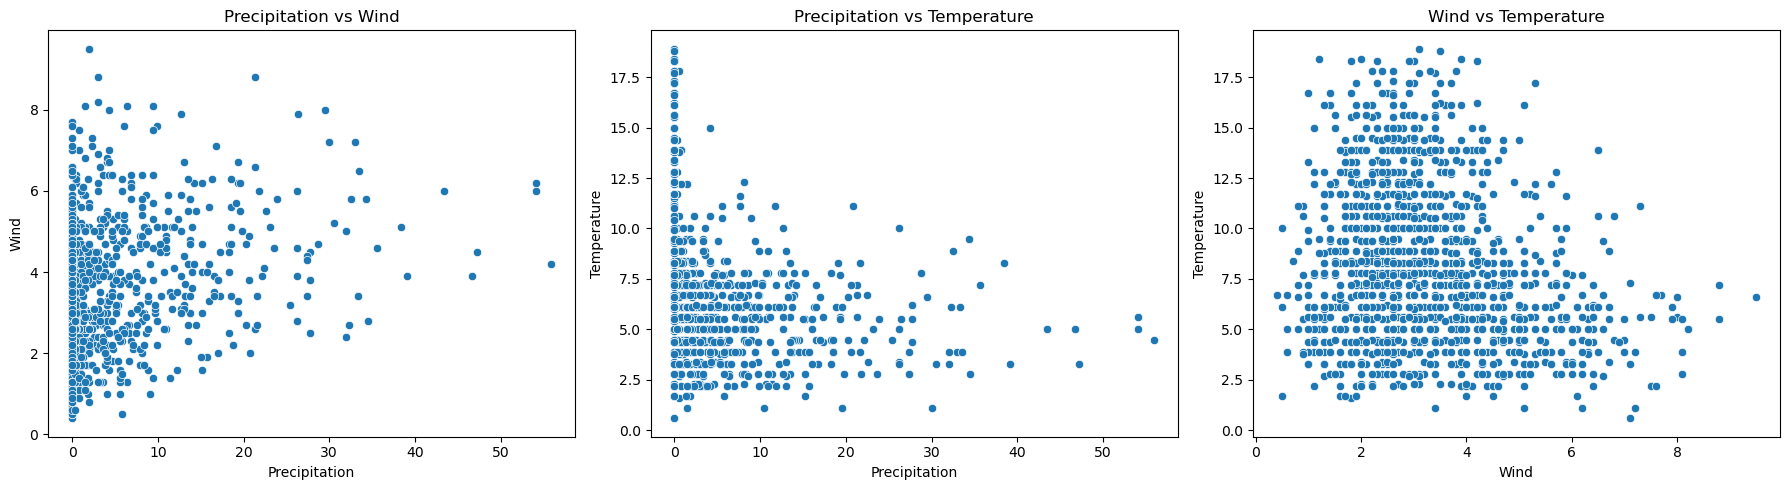

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plots for outlier detection
sns.scatterplot(x=df['precipitation'], y=df['wind'], ax=axes[0])
axes[0].set_title('Precipitation vs Wind')
axes[0].set_xlabel('Precipitation')
axes[0].set_ylabel('Wind')

sns.scatterplot(x=df['precipitation'], y=df['temp'], ax=axes[1])
axes[1].set_title('Precipitation vs Temperature')
axes[1].set_xlabel('Precipitation')
axes[1].set_ylabel('Temperature')

sns.scatterplot(x=df['wind'], y=df['temp'], ax=axes[2])
axes[2].set_title('Wind vs Temperature')
axes[2].set_xlabel('Wind')
axes[2].set_ylabel('Temperature')

plt.tight_layout()
plt.show()

no outliers

## Data Modelling

### 1. Linear Regression

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.svm import SVR

In [11]:
X = df[['precipitation', 'wind', 'temp']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Absolute Error (MAE): {mae}')
print(f"Mean Squared Error (MSE): {mse}")
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 5.643928756391713e-15
Mean Squared Error (MSE): 6.523457964552041e-29
R-squared (R²): 1.0


### 2. Random Forest

In [9]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MAE: {mae_rf}')
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f'Random Forest - R²: {r2_rf}')

Random Forest - MAE: 0.10989954441913415
Mean Squared Error (MSE): 0.054822673325739986
Random Forest - R²: 0.9947562862190987


### 3. XGBoost

In [10]:
xgb_model = XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - MAE: {mae_xgb}')
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f'XGBoost - R²: {r2_xgb}')

XGBoost - MAE: 0.09867474753655715
Mean Squared Error (MSE): 0.06463288313708818
XGBoost - R²: 0.9938179530576412


### 4. SVR

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - MAE: {mae_svr}')
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f'SVR - R²: {r2_svr}')

SVR - MAE: 0.07122217477680803
Mean Squared Error (MSE): 0.01735398596511504
SVR - R²: 0.9983401149590398


### 5. LSTM

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [15]:
X = df[['precipitation', 'wind', 'temp']].values
y = df['AQI'].values 

In [16]:
# Reshape X for LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)

In [18]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1022
Validation set size: 395
Testing set size: 44


In [21]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, 
    batch_size=32, 
    verbose=1
)

# Test
y_pred_lstm = lstm_model.predict(X_test)

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f'LSTM - MAE: {mae_lstm}')
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f'LSTM - R²: {r2_lstm}')

Epoch 1/10


D:\Apps\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 35.9509 - val_loss: 18.1555
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.4198 - val_loss: 3.3343
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6312 - val_loss: 0.3989
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3711 - val_loss: 0.2000
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2115 - val_loss: 0.1696
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1750 - val_loss: 0.1396
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1529 - val_loss: 0.1202
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1262 - val_loss: 0.1101
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1133 - val_loss: 0.1000
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0967 - val_loss: 0.0903
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
LSTM - MAE: 0.1604964779723774
Mean Squared Error (MSE): 0.08266983008070465
LSTM - R²: 0.9960666941770885


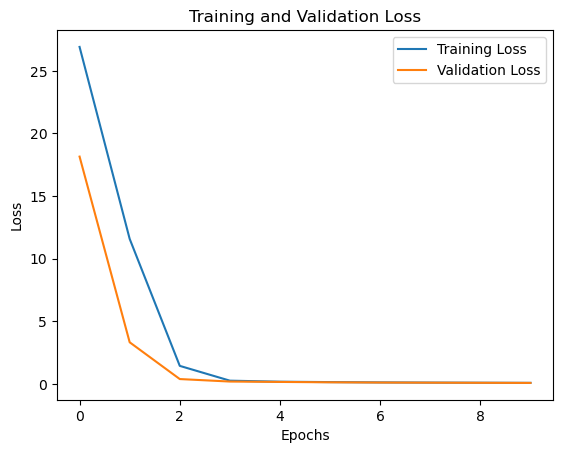

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Comparisons

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['LSTM', 'SVR', 'XGBoost', 'Random Forest', 'Linear Regression']

# Performance metrics
mae_values = [0.1605, 0.0712, 0.0987, 0.1099, 5.64e-15]
mse_values = [0.0827, 0.0174, 0.0646, 0.0548, 6.52e-29]
r2_values = [0.9961, 0.9983, 0.9938, 0.9948, 1.0]

#### Errors

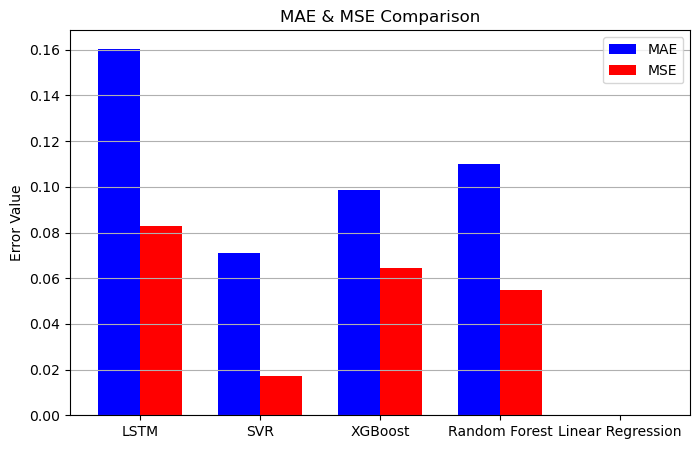

In [25]:
# Bar width and positions
bar_width = 0.35
x = np.arange(len(models))

# Plot the bars
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, mae_values, width=bar_width, color='blue', label='MAE')
plt.bar(x + bar_width/2, mse_values, width=bar_width, color='red', label='MSE')

# Labels and title
plt.xticks(x, models)
plt.title('MAE & MSE Comparison')
plt.ylabel('Error Value')
plt.legend()
plt.grid(axis='y')

# Show plot
plt.show()

#### R² Values

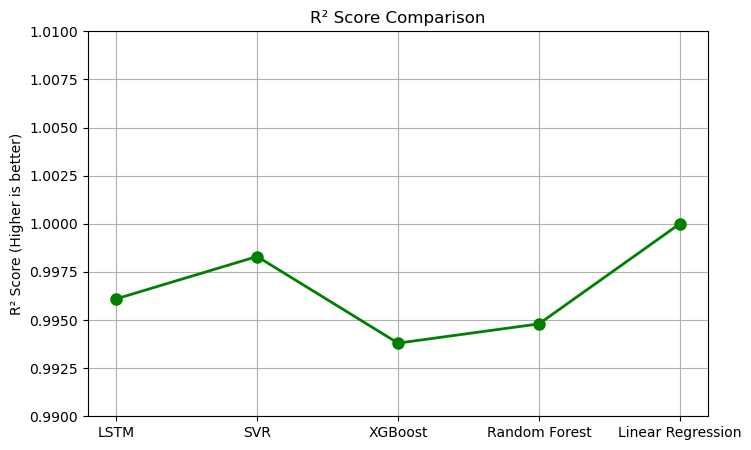

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(models, r2_values, marker='o', linestyle='-', color='green', markersize=8, linewidth=2)

# Labels and title
plt.title('R² Score Comparison')
plt.ylabel('R² Score (Higher is better)')
plt.ylim(0.99, 1.01)  # Since all R² are high
plt.grid()

# Show plot
plt.show()

## Model Selection
Since linear regression produced the smallest error and a perfect R² score, we will deploy this model. 
<br>
This high performance is expected, as the AQI values exhibit a linear relationship with the other parameters — <br>
precipitation, temperature, and wind speed. <br>
The relationship can be expressed by the following formula: <br>
AQI = x1 * precipitation + x2 * temperature + x3 * wind

### testing - user prompt

In [14]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

X = df[['precipitation', 'wind', 'temp']]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

precipitation = float(input("Enter precipitation value: "))
temp = float(input("Enter temperature value: "))
wind = float(input("Enter wind speed value: "))

# Prepare input features
input_features = np.array([[precipitation, temp, wind]])

# Predict the AQI
predicted_aqi = model.predict(input_features)

# Print the result
print(f"Predicted AQI for the given input is: {predicted_aqi[0]:.2f}")

Enter precipitation value:  0.8
Enter temperature value:  2.3
Enter wind speed value:  4.5


Predicted AQI for the given input is: 2.21


In [36]:
def predict_aqi(precipitation, temp, wind):

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    input_features = np.array([[precipitation, temp, wind]])
    
    predicted_aqi = model.predict(input_features)
    
    return predicted_aqi[0]

In [39]:
predicted_aqi = predict_aqi(12.5, 30, 15)
print(f"Predicted AQI for the given input is: {predicted_aqi:.2f}")

Predicted AQI for the given input is: 16.75


### Save the best model

In [15]:
import joblib
import pickle

joblib.dump(model, 'aqi_lr.pkl')
print("Model saved as 'aqi_lr.pkl'")

Model saved as 'aqi_lr.pkl'
